<a href="https://colab.research.google.com/github/jumarquez24/PARCIAL3SYS/blob/main/Parcial3_JDMC_SyS_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 3

NOMBRE:\JUAN DANIEL MARQUEZ CORRALES 1193074902
2 de junio de 2023

# Punto 1 (2.5)

In [1]:
!pip install sympy --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
sym.init_printing()

s = sym.symbols('s', complex=True)
t,R, L, C = sym.symbols('t R L C', positive=True, real=True)

Definimos los parámetros de la función de transferencia que hallamos para el sistema.

In [3]:
K = 1/100 # Ganancia estática (Dada la que se obtuvo K = 1/k; k = 100)
wn = sym.sqrt(1/(L*C)) # Frecuencia natural 
xi = 1/(2*wn*R*C) # Factor de amortiguamiento
H = K*(wn**2/(s**2 + 2*xi*wn*s + wn**2)) # Función de transferencia SLIT 2 orden

Con los cálculos que se encuentran en el pdf pudimos hallar los valores necesarios para los parámetros RLC tal que la función y su respuesta sea equivalente con los elegidos para m, k y c. Dichos valores se reemplazan en el siguiente diccionario y sustituyen en la función H.

In [4]:
RLC = {R: 222, L:33, C: 300e-6}
Hev = H.subs(RLC)
Hev

             1.01010101010101            
─────────────────────────────────────────
 2                                       
s  + 15.015015015015⋅s + 101.010101010101

Ya contando con la función de transferencia evaluada, importamos del paquete de control todas las funciones necesarias para obtener las gráficas solicitadas de polos y ceros, Bode, respuesta al impulso y al escalón.

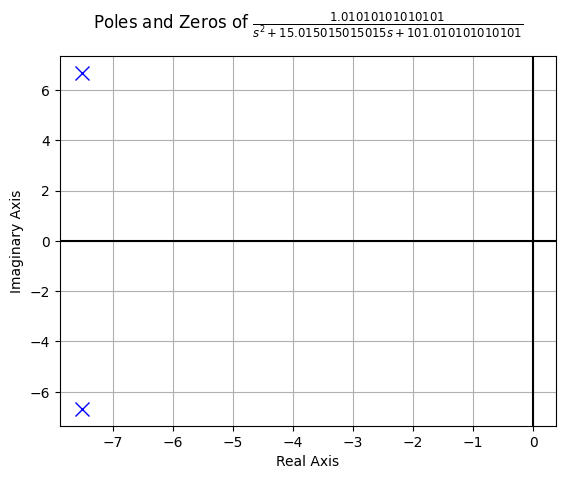

In [5]:
# Gráficas con paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot,bode_plot,impulse_response_plot,step_response_plot 
num,den=sym.fraction(Hev)
tf = TransferFunction(num, den, s)# Numerados y denominador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf) # Graficamos polos y ceros

El sistema cuenta entonces únicamente con dos polos ubicados en la parte izquierda del plano complejo (el sistema es estable). No existe ningún cero.

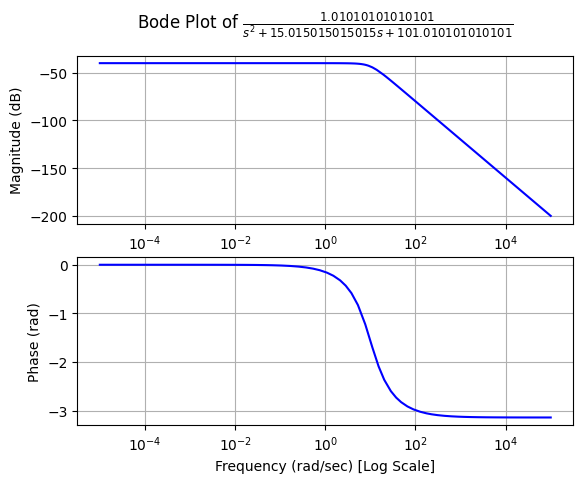

In [6]:
bode_plot(tf) # Diagrama de Bode

Vemos que el sistema atenúa mucho más las frecuencias más altas, dejando las bajas (menores a 100Hz con la ganancia K). Igualmente su fase cambia para dichas frecuencias.

In [7]:
(xi.subs(RLC)).evalf()

0.746987565395360

Efectivamente el valor de $\xi$ es aproximadamente el hallado con los parámetros del sistema masa-resorte-amortiguador, de 0.75 dando lugar a un sistema subamortiguado.

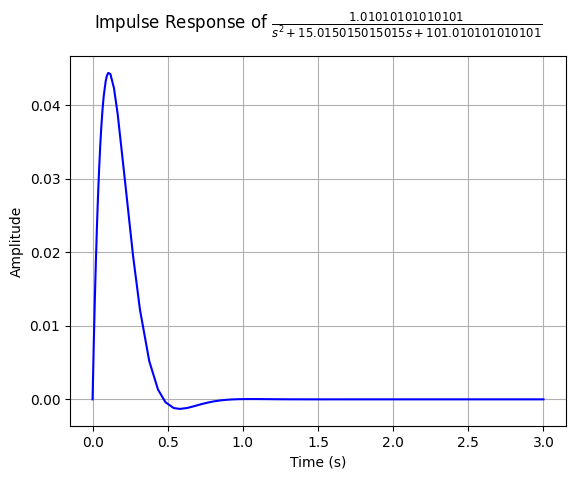

In [8]:
impulse_response_plot(tf,upper_limit=3) # Respuesta al impulso

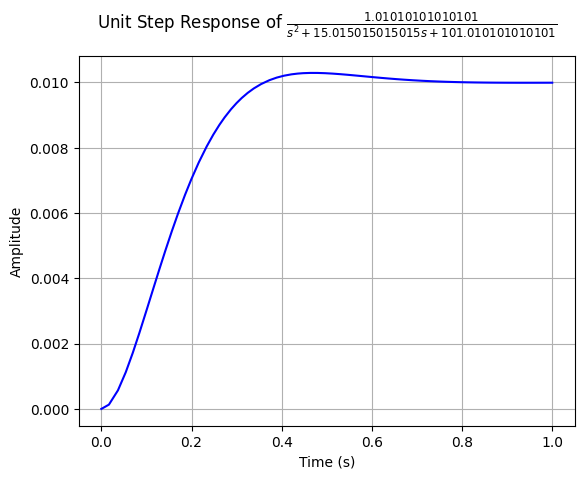

In [9]:
step_response_plot(tf,upper_limit=1) # Respuesta al escalón

Observamos que las respuestas no presentan unas oscilaciones muy significativas ni picos muy altos, con un tiempo de establecimiento corto. Esto es esperable dado el valor de $\xi$ más cercano a 1 que a 0.

# Punto 2 (2.5)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Obtenemos y convertimos la canción de youtube para poder utilizarla dentro del cuadernillo.

In [11]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 102.4 MB/s eta 0:00:00
  Created wheel for yt-dlp: filename=yt_dlp-2023.3.4-py2.py3-none-any.whl size=2743321 sha256=28392a45c42a75186ea60e3cb395650c117c21e2b9bc3cf971a5e8c26c714a3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-6wya48z5/wheels/4c/91/d1/c5369304

In [12]:
link="https://www.youtube.com/watch?v=D5drYkLiLI8"
!yt-dlp --extract-audio -o "cancion" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=D5drYkLiLI8
[youtube] D5drYkLiLI8: Downloading webpage
[youtube] D5drYkLiLI8: Downloading android player API JSON
[info] D5drYkLiLI8: Downloading 1 format(s): 251
[download] Destination: cancion
[download] 100% of    3.62MiB in 00:00:00 at 31.91MiB/s
[ExtractAudio] Destination: cancion.mp3
Deleting original file cancion (pass -k to keep)


In [13]:
! ffmpeg -i cancion.mp3 output.wav 

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [14]:
import soundfile as sf 

nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))


Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [15]:
from IPython.display import Audio
ti = 0 #tiempo incio a procesar seg
tf = 5 #tiempo final a procesar seg
xs = x[int(ti*fs):int((tf*fs)),:]

Audio(xs.T,rate=fs)

Ya con la canción descargada, vamos a utilizar solo uno de los dos canales que trae el archivo para facilitar el trabajo.

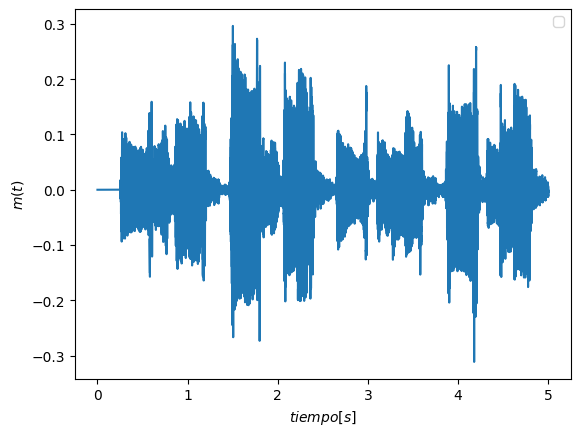

In [40]:
song = xs[:,0]
tt = np.arange(ti, tf, 1/fs) # Vector de tiempo para el canal solo
plt.plot(tt, song)
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

In [18]:
Audio(song, rate=fs) # Escuchamos nuevamente la canción y vemos que no se modifica

Para empezar a realizar el procedimiento pedido, lo primero que hacemos es modular la señal en AM.

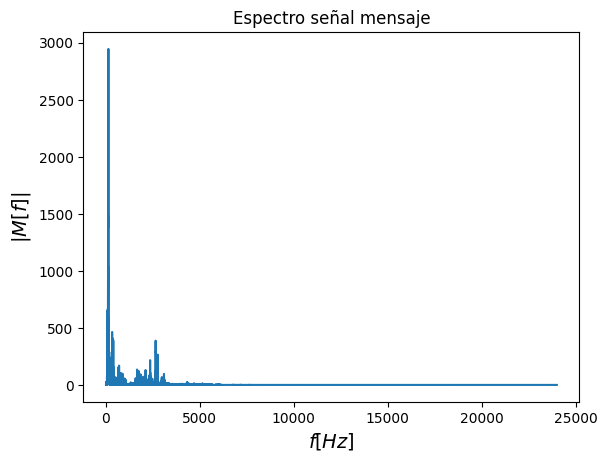

In [41]:
Mw = np.fft.rfft(song) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(song.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

Viendo su espectro podemos elegir una frecuencia adecuada para la modulación, dado que $F_0>>F_{max}$. Así, elegimos una $F_0=10kHz$.

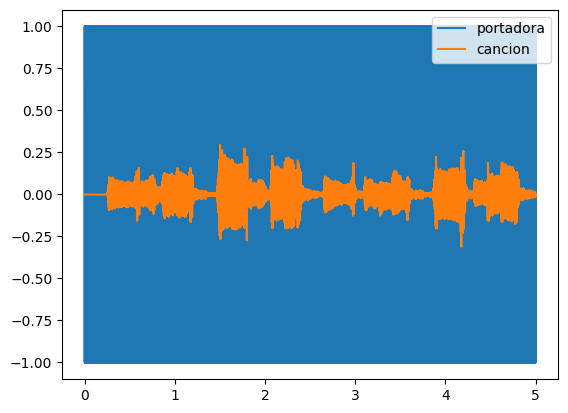

In [42]:
# Im = 0.5 #Indice de modulacion
F0 = 10000 #Frecuencia de la portadora
A1 = max(abs(song))*3 #Amplitud de la portadora según índice de modulación
c = np.cos(2*np.pi*F0*tt) #Señal Portadora

plt.plot(tt,c,label='portadora')
plt.plot(tt,song,label='cancion')
plt.legend()
plt.show()


In [23]:
Audio(c,rate=fs) # Reproducimos la señal portadora

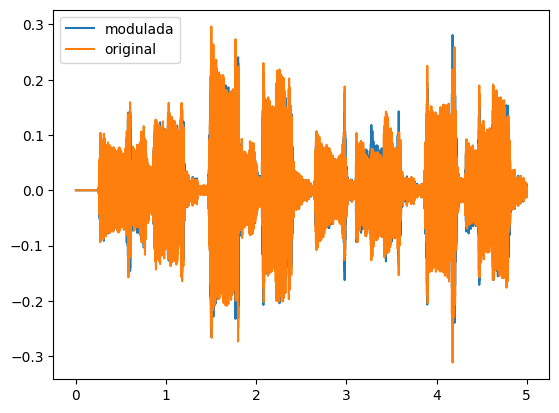

In [22]:
y = A1*song*c #Señal modulada

plt.plot(tt, y,label='modulada')
plt.plot(tt,song,label='original')
plt.legend()
plt.show()

In [24]:
Audio(y, rate=fs) # Reproducimos la señal modulada

Así vemos que se produjo la modulación; al escuchar el audio comprobamos que su frecuencia se encuentra "desplazada". Lo cual también nos lo muestra Fourier.

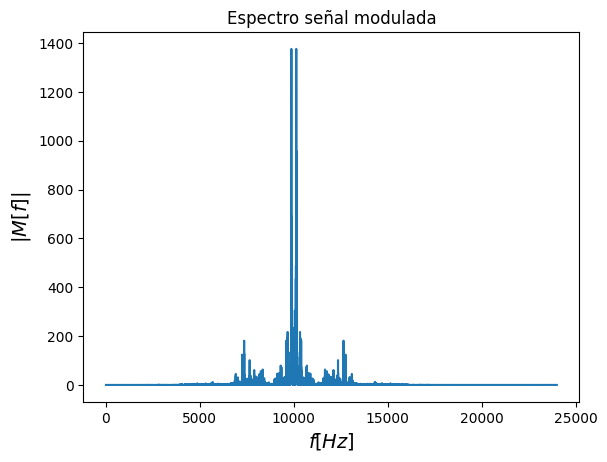

In [25]:
Mw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(y.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

Vamos entonces a demodular la señal, siguiendo los pasos dados en el diagrama de la siguiente forma:
1. Multiplicamos nuevamente por la portadora $c(t) = \cos({2\pi F_0 t})$


In [26]:
mezcla = y * c

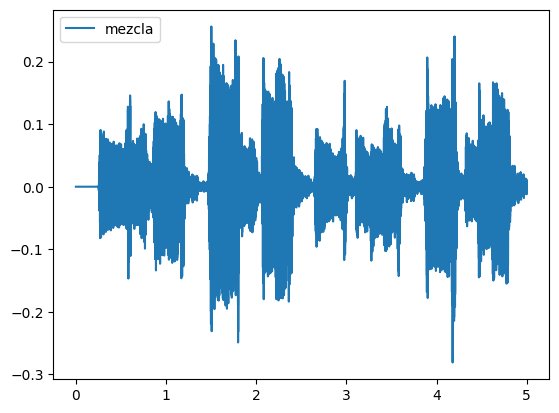

In [27]:
plt.plot(tt, mezcla,label='mezcla')
#plt.plot(tt,song,label='original')
plt.legend()
plt.show()

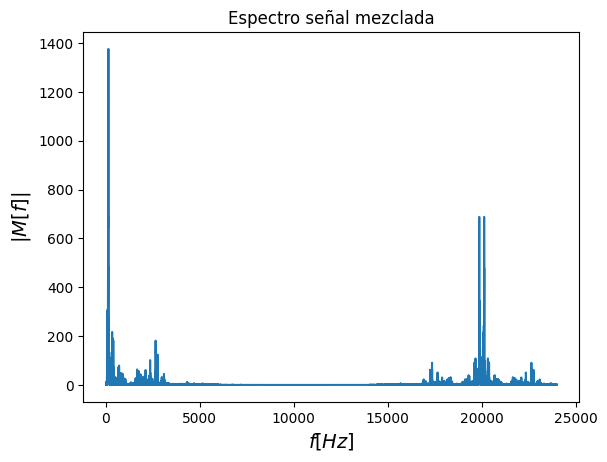

In [28]:
Mw = np.fft.rfft(mezcla) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(mezcla.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mezclada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

In [29]:
Audio(mezcla,rate=fs) # reproducimos la señal mezclada de nuevo con la portadora

Escuchamos que ahora vuelve a ser audible el audio de la canción, pero presenta un ruido de fondo que es lo siguiente que vamos a eliminar por medio de un filtrado de las frecuencias altas que vienen de la portadora, tal cual podemos ver en el espectro para hacernos bien a la idea.

2. Dada la identidad del coseno al cuadrado, esta multiplicación separa la señal modulada en lo siguiente:

$$
\begin{align*}
y(t)c(t) &= {A_1}m(t)\cos(2\pi F_0t)c(t) \\
&= A_1m(t)c(t)^2 = {A_1}m(t)\cos^2(2\pi F_0t) \\
&= \frac{A_1m(t)}{2} +\frac{A_1m(t)}{2}\cos^2{(4\pi F_0 t)} \\
\end{align*}
$$

3. Aplicación de un filtro pasabajas que elimine las altas frecuencias de la portadora (la identidad nos deja con el ángulo doble, es decir, una frecuencia más alta), quedando así únicamente la señal escalada:

$$
\begin{align*}
    \frac{A_1}{2} m(t) 
\end{align*}
$$

Implementamos un filtro de butterworth de orden = 1 para esta etapa, con frecuencia de corte en los 10kHz de la portadora.

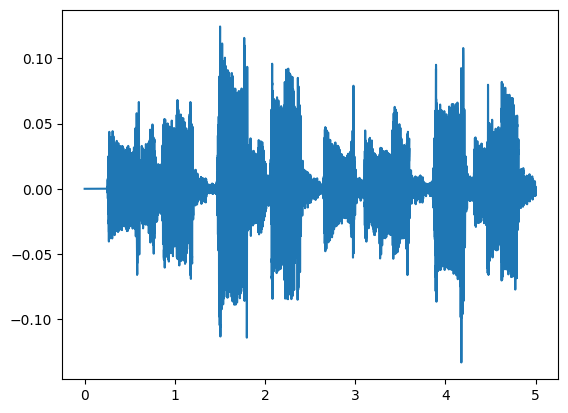

In [30]:
from scipy.signal import ellip,  lfilter, freqz

filtro = "lowpass"
N = 6  # Se aplica un filtro pasabaja eliptico con frecuencia de corte igual a la frecuencia de la portadora y orden N
frec = F0        

ripple_pass = 1
ripple_stop = 100
num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=frec,btype=filtro, fs=fs)

w, h = freqz(num, den, fs=fs) 
demodulada = lfilter(num, den, mezcla, axis=0)

plt.plot(tt, demodulada)

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show() 

In [32]:
def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()
    
  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')
    
  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

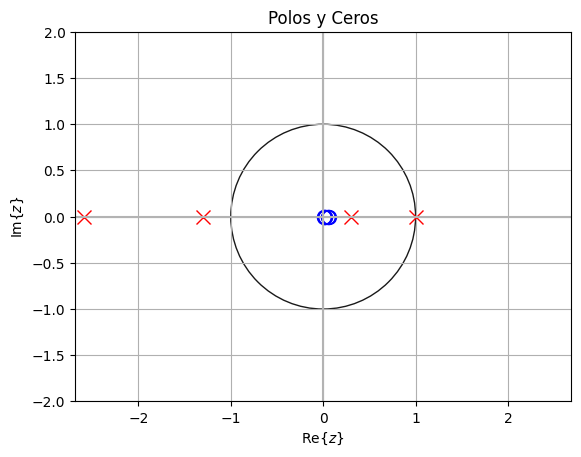

In [33]:
show_zp(num, den, title='Polos y Ceros')

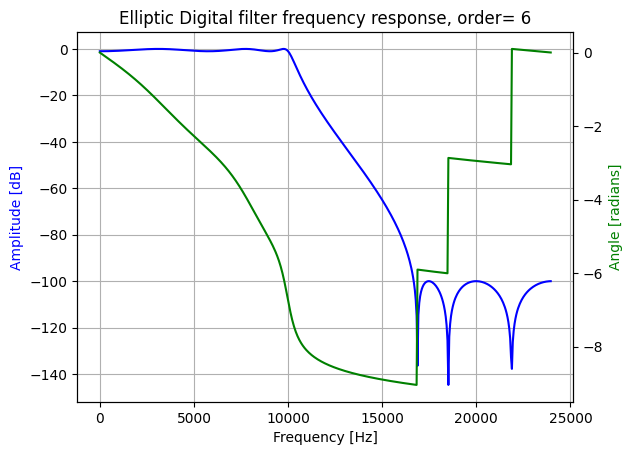

In [34]:
plot_freq_response('Elliptic', w, h, N)

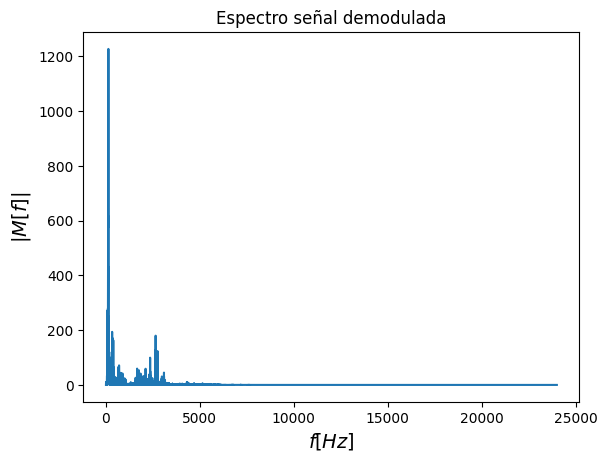

In [35]:
Mw = np.fft.rfft(demodulada) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(demodulada.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal demodulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

In [36]:
Audio(demodulada,rate=fs)

4. Luego se escala por $\frac{2}{A_1}$ para obtener el mensaje (canción) como se hallaba originalmente:

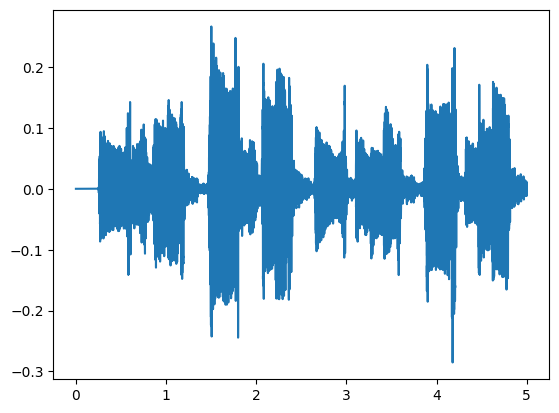

In [37]:
mensaje_final = (2/A1)*demodulada
                        
plt.plot(tt, mensaje_final)

Finalmente reproducimos nuevamente la señal y obtenemos el mismo mensaje sin mayores alteraciones después de la modulación y demodulación.

In [38]:
Audio(mensaje_final.T, rate=fs)

In [39]:
Audio(song,rate=fs)